# Using napari plugins

Functionalities of napari can be extended via a plugin system. We will see in a later chapter how to develop such a plugin. For the moment we'll learn how to find, install and use them.

In [1]:
import napari
from napari.utils import nbscreenshot

## What is a plugin?

A plugin is simply a Python package so it gets installed like any other package via pip or conda. napari plugin packages have however specific information that allows napari to detect them automatically and to integrate them in the interface. There are different types of plugins, some allow to read certain file format, some provide a user interface etc. and we'll see these possibilities in detail later. For the moment we'll just install a plugin and see how it works.

## The napari hub

The napari-hub [napari-hub](https://www.napari-hub.org/) collects officially released plugins, makes them searchable and displays useful information about them such as their latest release, compatibility with Python versions etc. The site is searchable for key words to limit the number of plugins to browse through when searching for something specific. Once you have found a relevant plugin, you can either follow manual installation instruction, via pip and/or conda, or you can try to use the plugin manager which you can find in the napari menu at ```Plugins -> Install/Uninstall Pugins...``` The manager essentially wraps the ```pip/conda install``` process for users not familiar with that infrastructure.

<img src='../illustrations/plugin_interface.png'>

In this window you can search for your plugin in the ```filter...``` field. Once you have found the right one, you can just click on the install button. Note that because of the fast-evolving nature of napari, it's not 100% guaranteed that the installation will work.

## Plugins not on the hub

It is not a requirement to publish a plugin on the napari-hub. In particular when a plugin has been developed for a specific project, or a plugin is in its early days, it's probable that the plugin will only be available on GitHub. In that case you need to install it with a regular ```pip``` command.


## An example

In the previous chapter, you were asked in the exercise to crop an image using a square. As you noticed, it's fairly easy to do but still requires some work and thinking. This is the kind of task for which you can usually find a plugin. In this case it is the napari-crop plugin. The plugin has already been installed in the environment, but if you didn't follow the instructions you can install it with:

```bash
pip install napari-crop
```

If we go to the plugins menu we see there a line saying napari-crop which is the plugin/package that we just installed. Sometimes plugins offer multiple parts like here. We'll test first ```crop_region```:

In [6]:
viewer = napari.Viewer()
viewer.window.add_plugin_dock_widget('napari-crop', 'crop_region');

In [7]:
viewer.open_sample('napari','cells3d')

[<Image layer 'membrane' at 0x3406e1700>,
 <Image layer 'nuclei' at 0x32b142d50>]

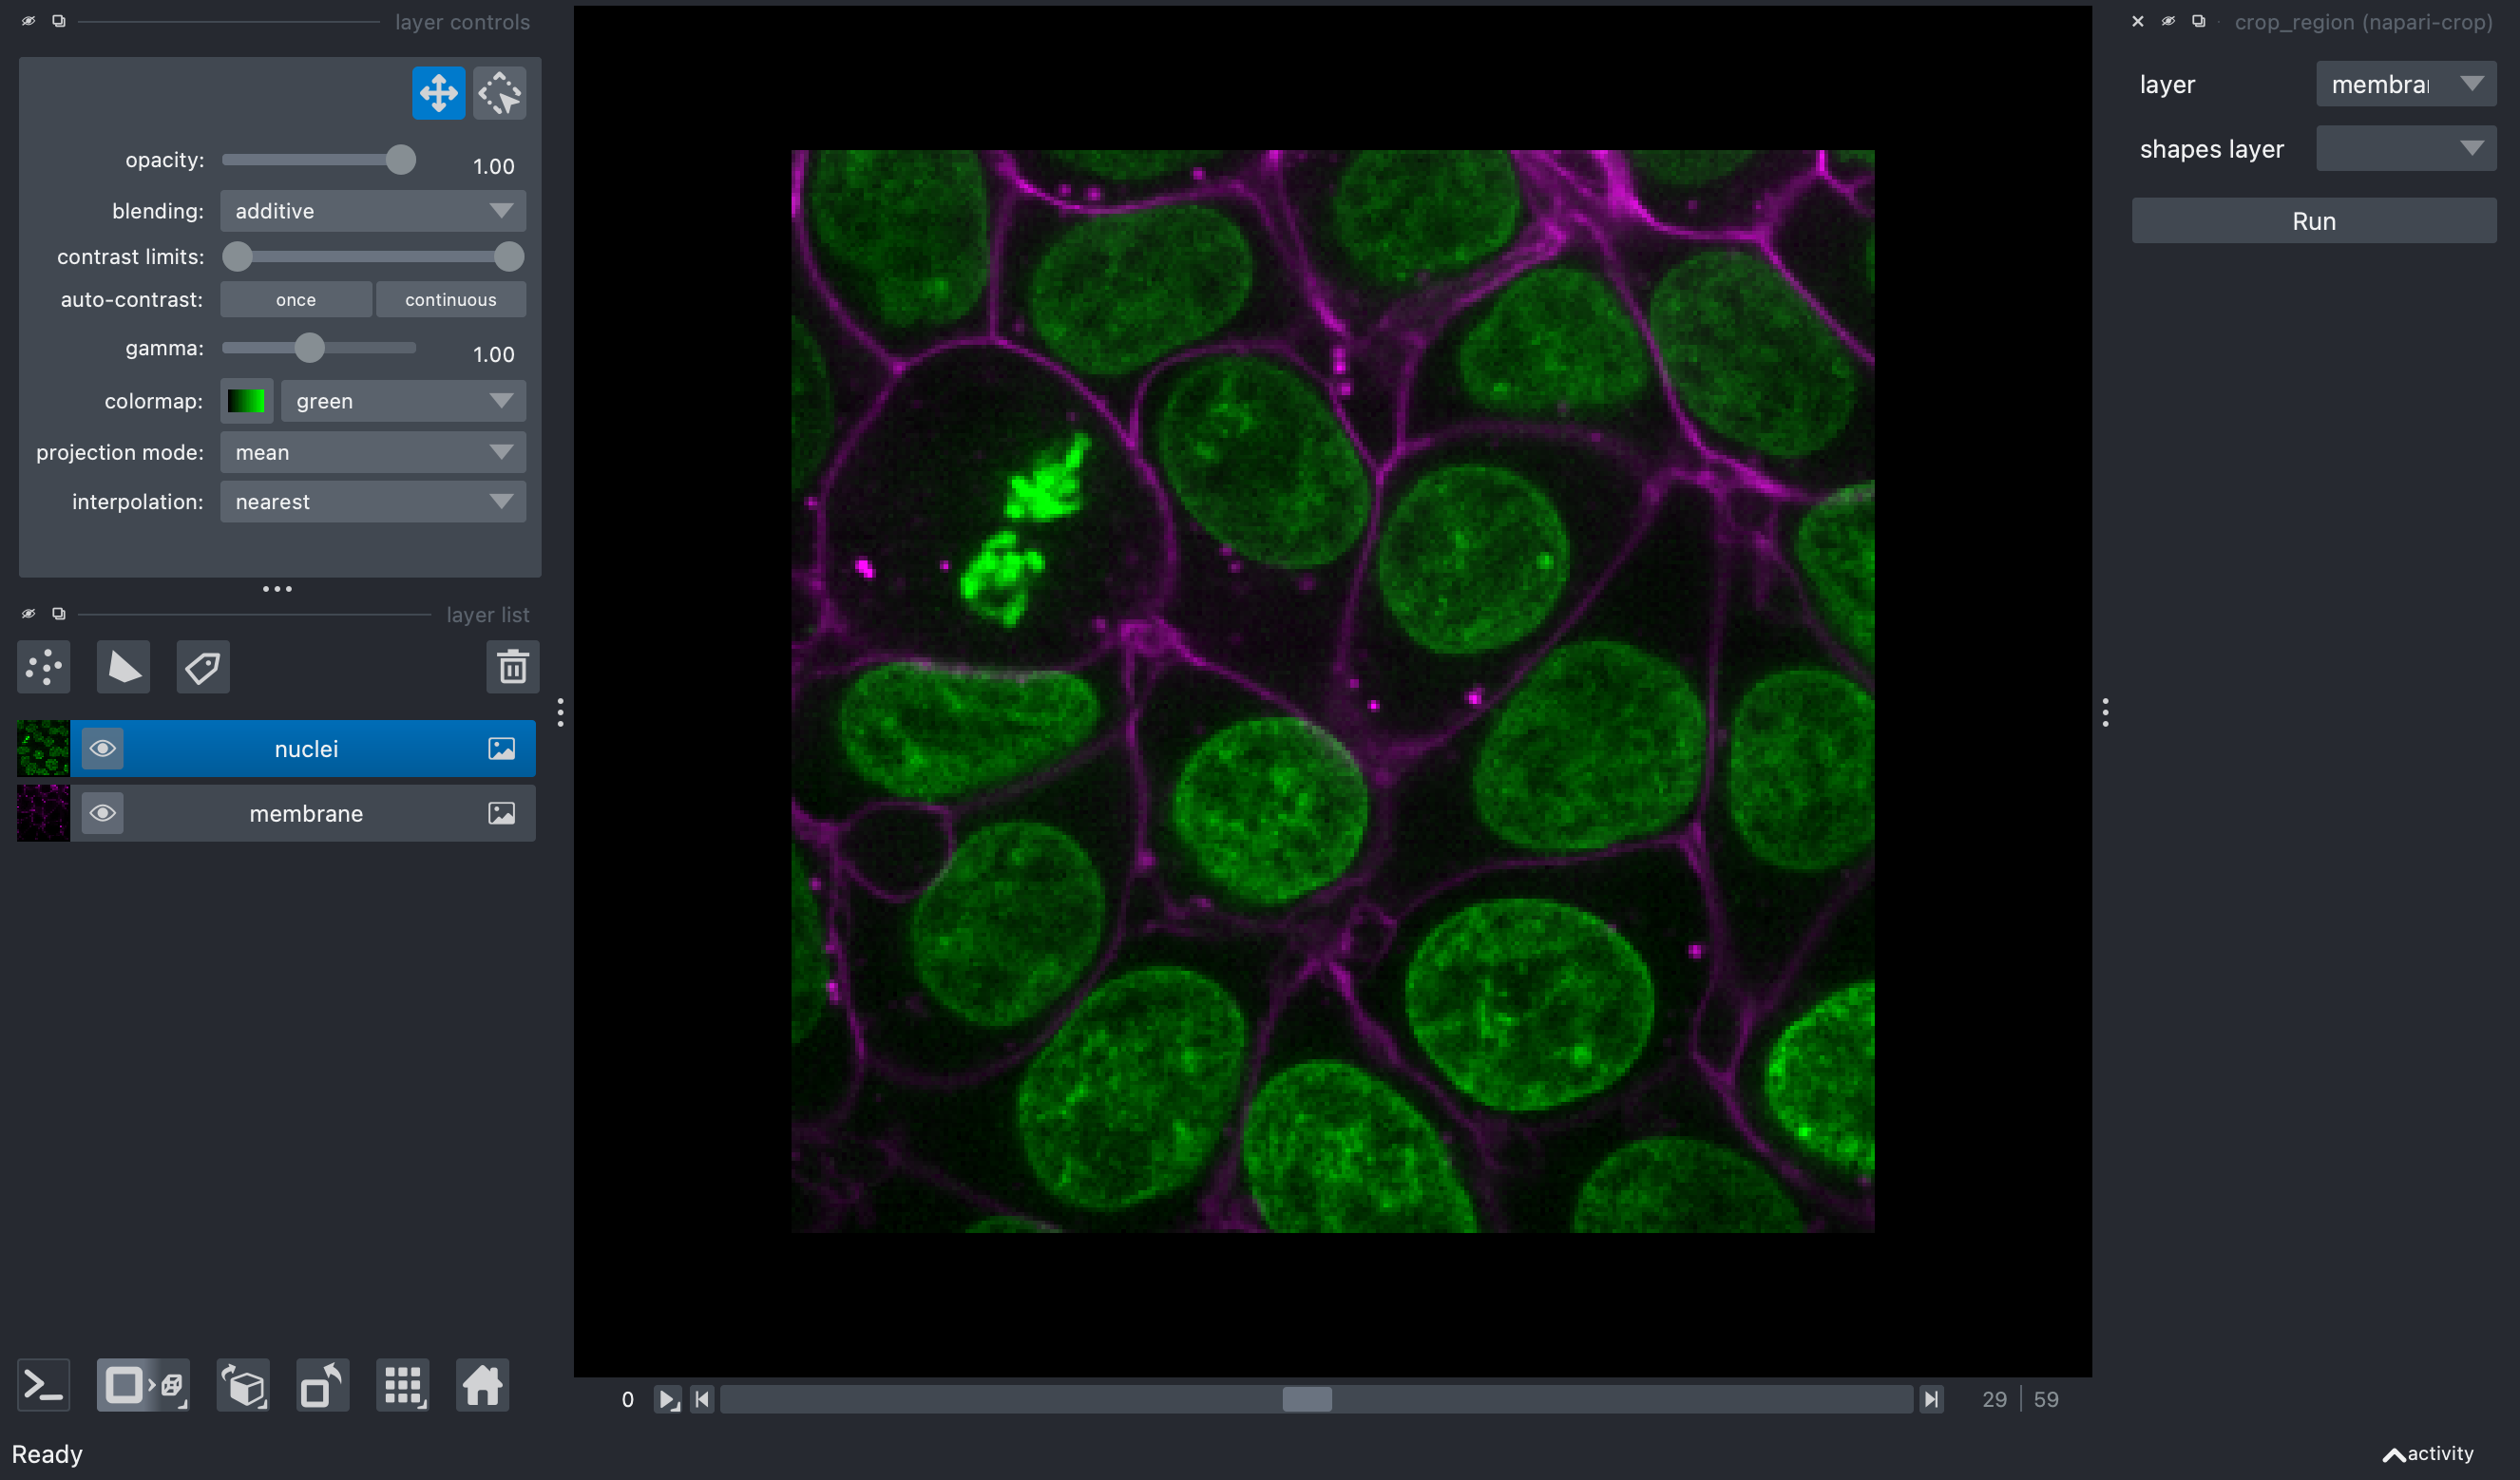

In [8]:
nbscreenshot(viewer=viewer)

The plugin requires two layers: one to crop and one with the shape used to crop. So we add a shapes layer with a rectangle for cropping:

In [9]:
viewer.add_shapes([[[29,62,132],
                    [29,127,132],
                    [29,127,192],
                    [29,62,192]]], edge_color='red', face_color=[0,0,0,0])

<Shapes layer 'Shapes' at 0x347a90da0>

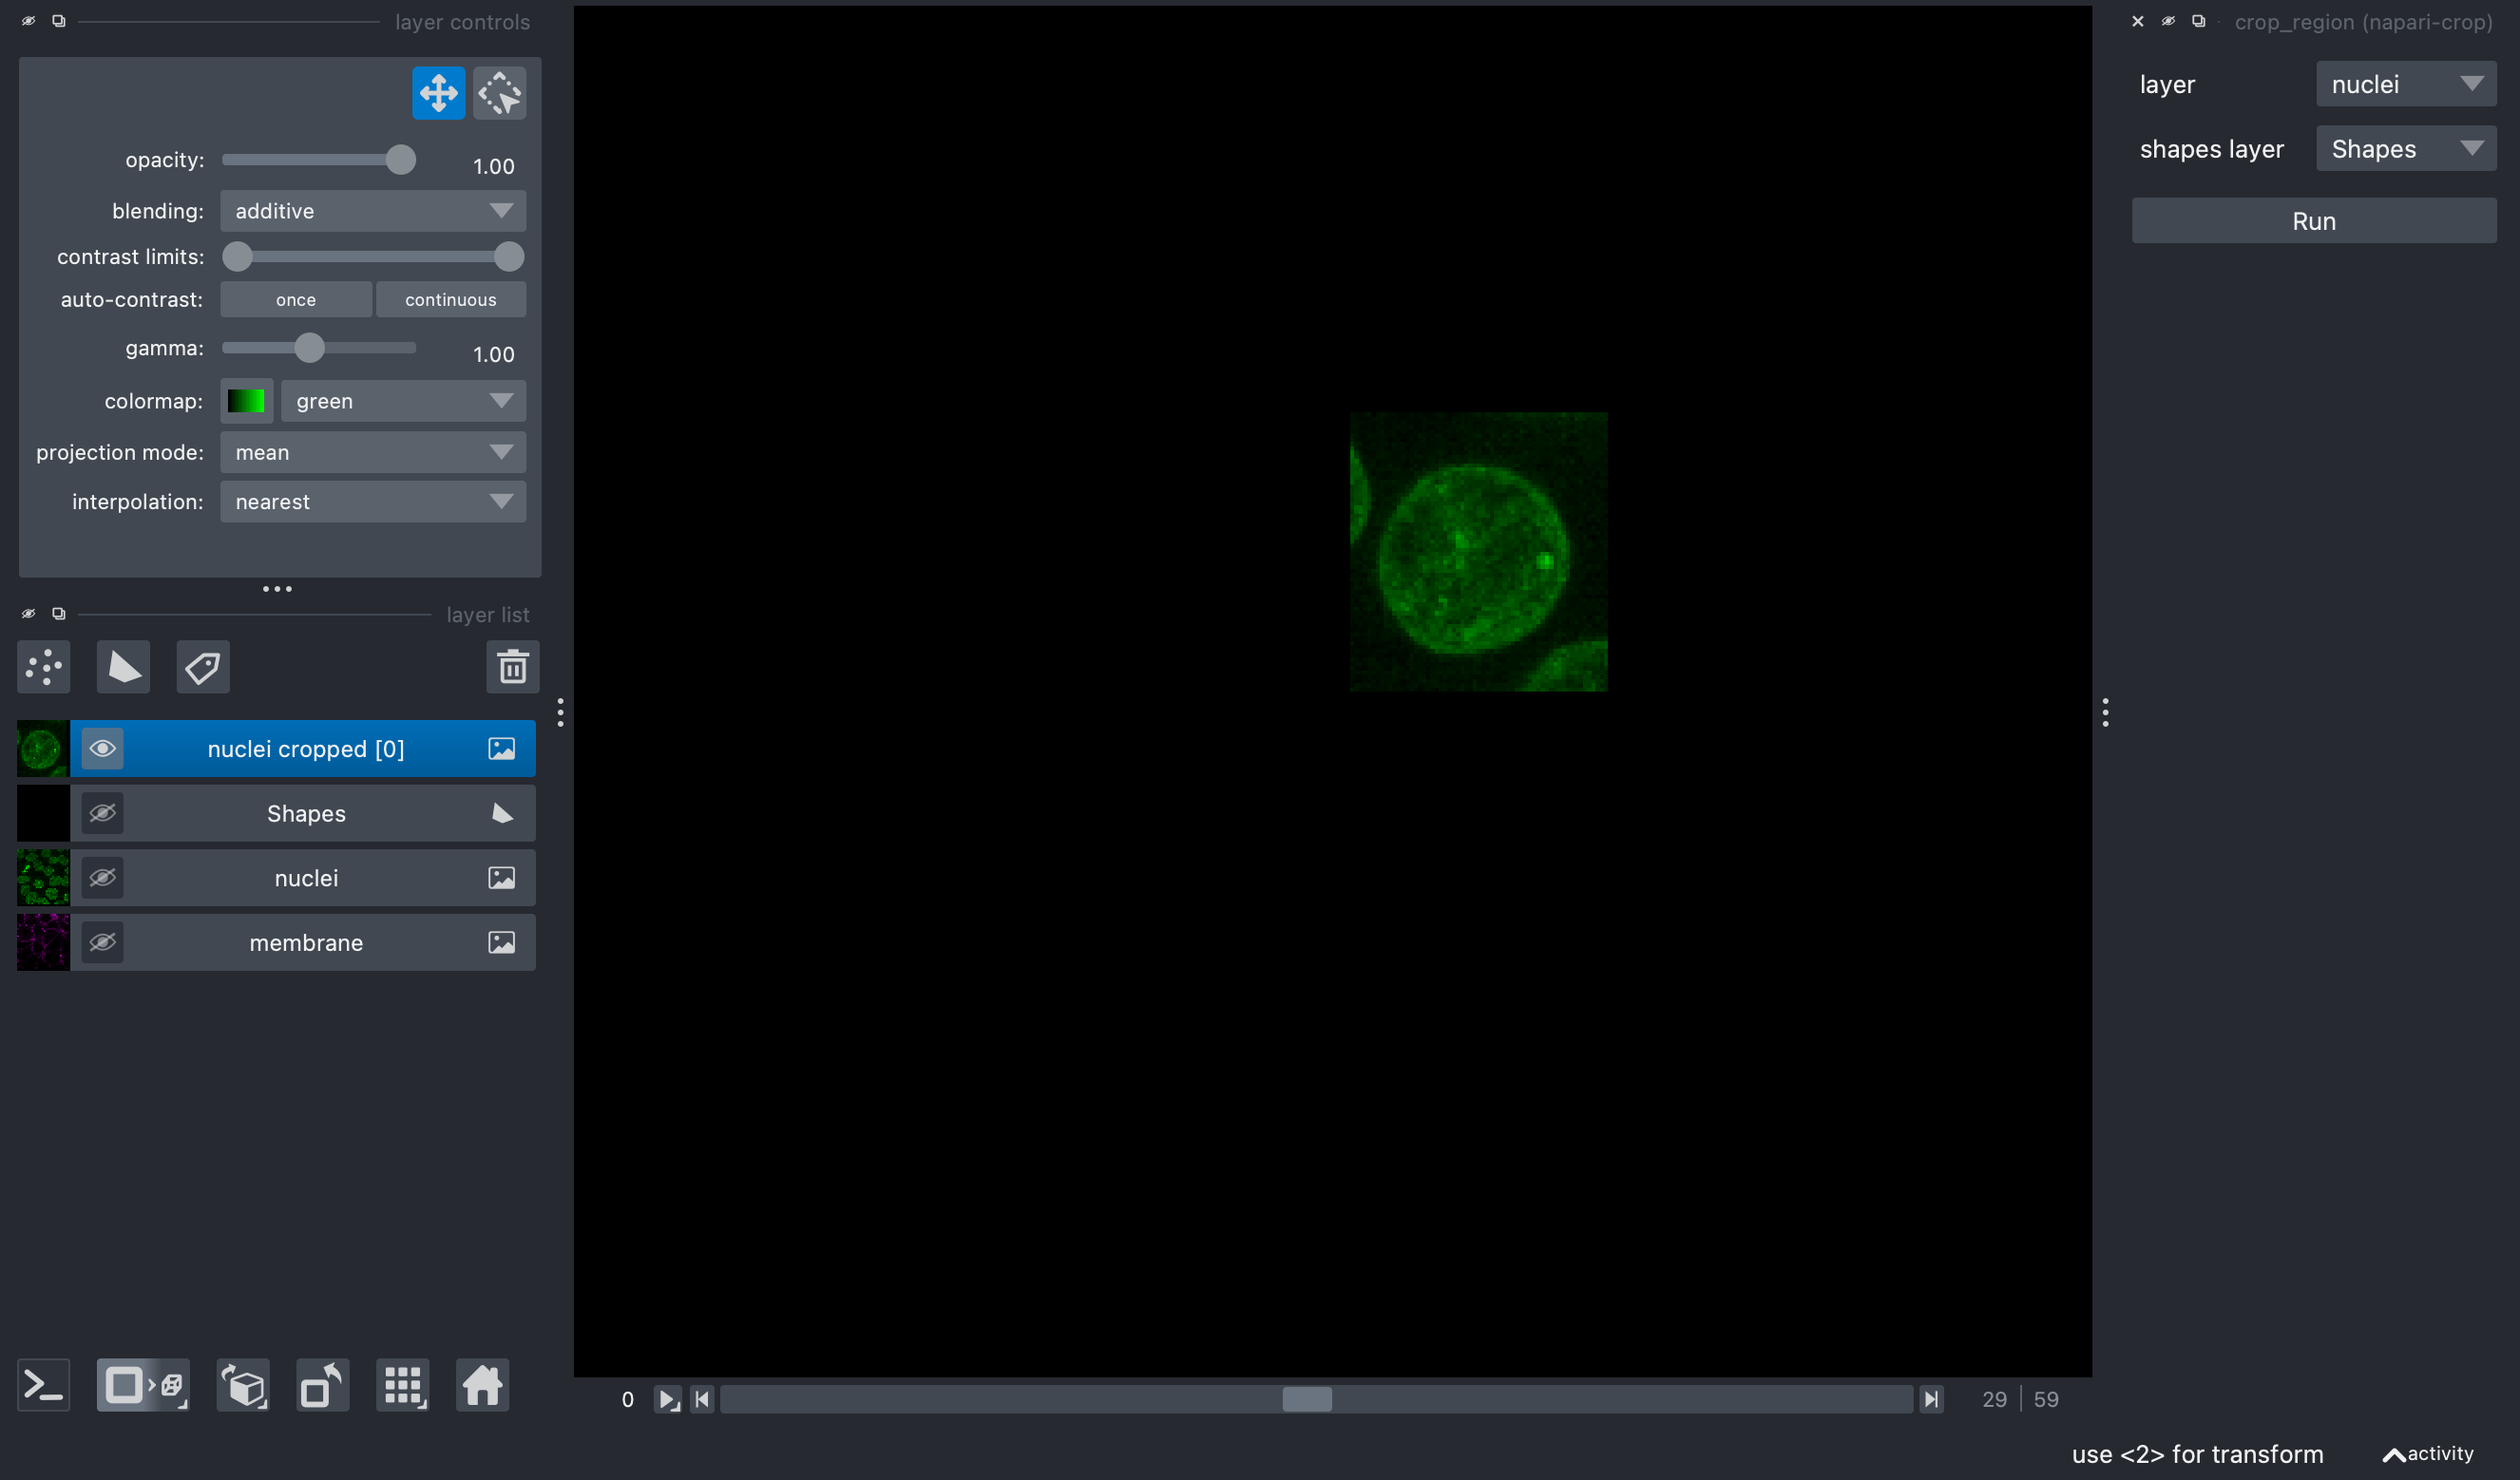

In [11]:
nbscreenshot(viewer=viewer)

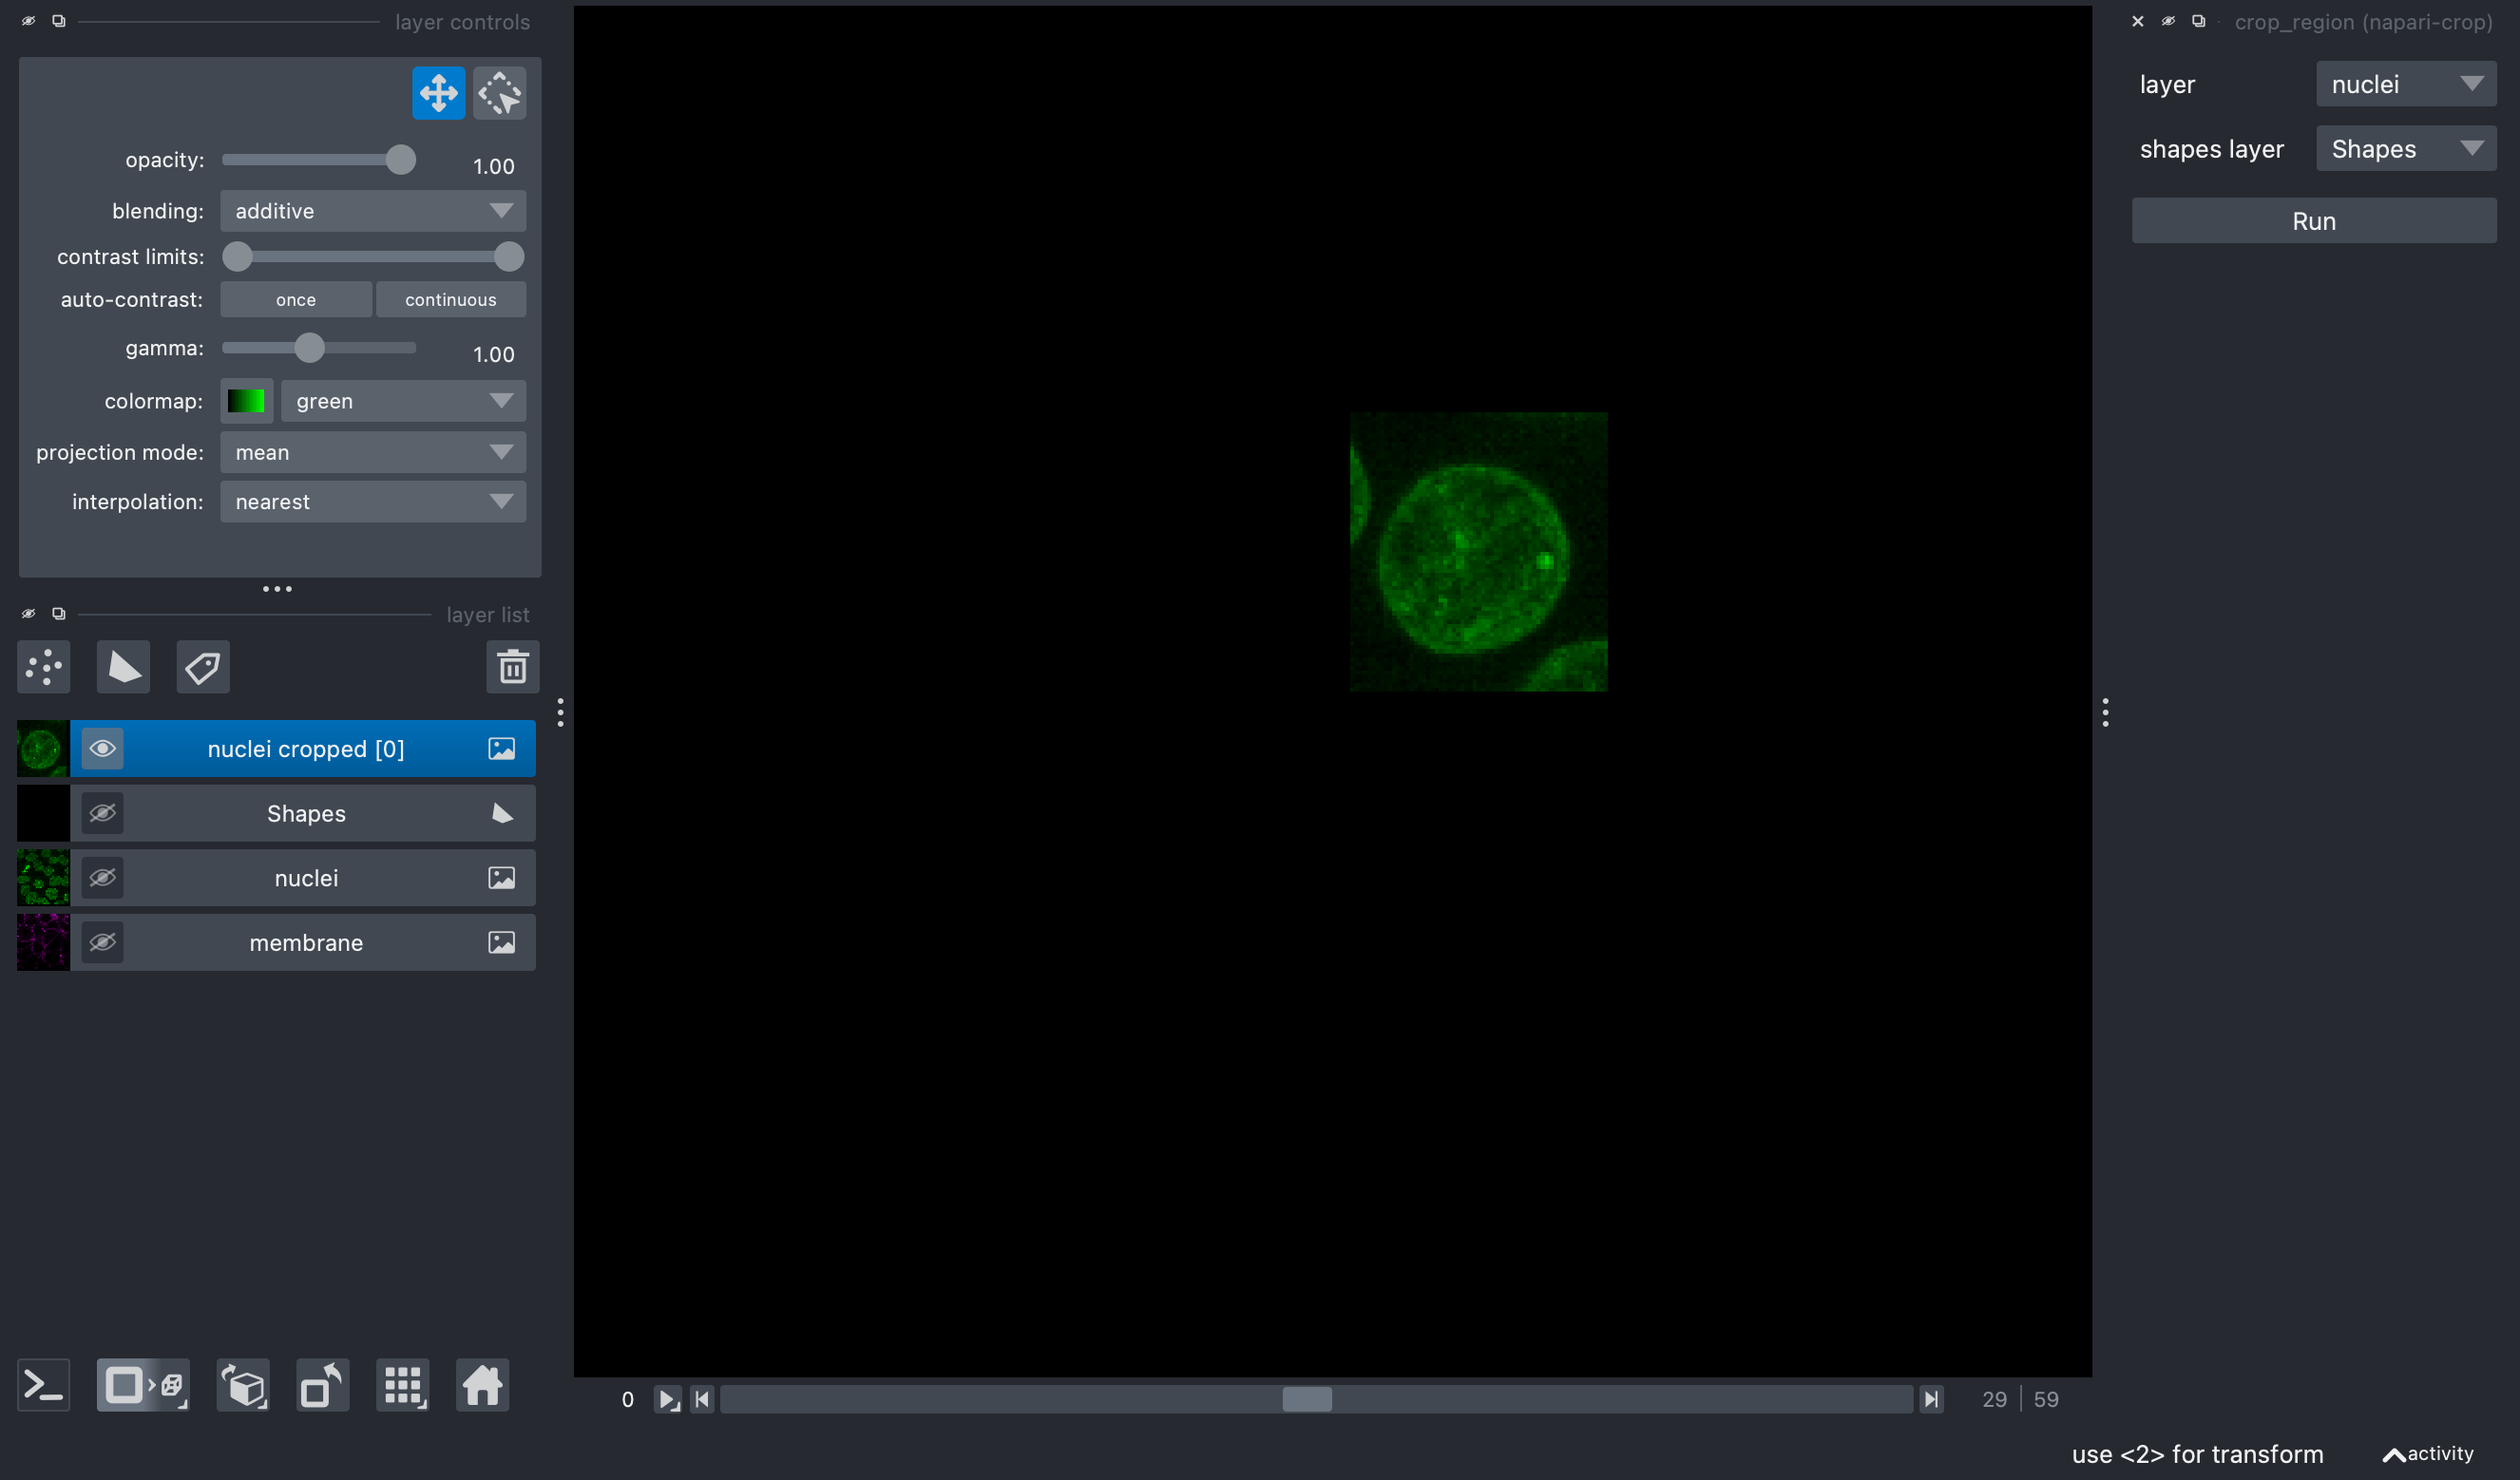

In [10]:
nbscreenshot(viewer=viewer)

Then we click run and get the cropped region:

## Exercise

- Install the [napari-skimage](https://www.napari-hub.org/plugins/napari-skimage) plugin in your environment
- Open the ```Cells (3D+2Ch)``` image and keep only nuclei
- Recover the data in Jupyter
- Using the plugin functionalities, create a mask using Otsu's method
- Using the plugin functionalities, create a labeled image from the mask
- Go to ```Tools -> Measurement tables -> Regionprops (scikit-image, nsr)```
- Try to pick a color in the image and see what happens in the table